<a href="https://colab.research.google.com/github/Meghana1303/ML_Sentiment_Label_Model/blob/master/IntroductionToLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Import packages
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sns
import math

# make plots appear inline in the notebook
%matplotlib inline

Text(0.5, 1.0, 'Data for regression')

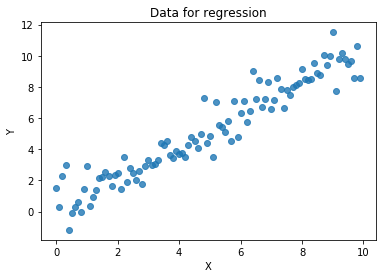

In [2]:
nr.seed(34567)
x = np.arange(start = 0.0, stop = 10.0, step = 0.1)
y = np.add(x, nr.normal(scale = 1.0, size = x.shape[0]))

sns.regplot(x, y, fit_reg = False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data for regression')

In [0]:
## Randomly sample cases to create independent training and test data
#bernoulli sampling
nr.seed(9988)
indx = range(len(x))
indx = ms.train_test_split(indx, test_size = 50)
x_train = np.ravel(x[indx[0]])
y_train = np.ravel(y[indx[0]])
x_test = np.ravel(x[indx[1]])
y_test = np.ravel(y[indx[1]])

In [0]:
## Scale the feature, being sure to use the scale of the training
## data not the test data. 
scaler = preprocessing.StandardScaler().fit(x_train.reshape(-1,1))
x_train = scaler.transform(x_train.reshape(-1,1))     
y_train = scaler.transform(y_train.reshape(-1,1))

In [5]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train.reshape(-1,1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

[0.08516893]
[[1.03285118]]


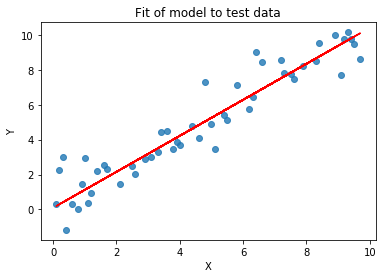

In [7]:
def plot_regression(x, y_score, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_score, c = 'red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fit of model to test data')

y_score = lin_mod.predict(x_test.reshape(-1,1)) 

plot_regression(x_test, y_score, y_test)

In [8]:
#evaluating the model
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters - 1) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
    
print_metrics(y_test, y_score, 2)

Mean Square Error      = 1.0178480188322825
Root Mean Square Error = 1.008884541873986
Mean Absolute Error    = 0.763059846639255
Median Absolute Error  = 0.6031435928079797
R^2                    = 0.8979014436983853
Adjusted R^2           = 0.7914582679796807


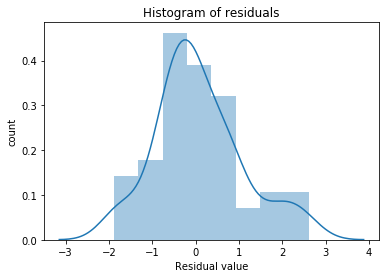

In [9]:
#kde plotting of the residual
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)

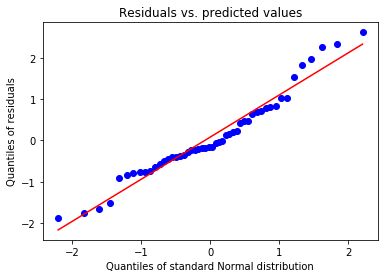

In [10]:
#Quantile-Quantile Normal plot, or Q-Q Normal plot
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    
resid_qq(y_test, y_score)

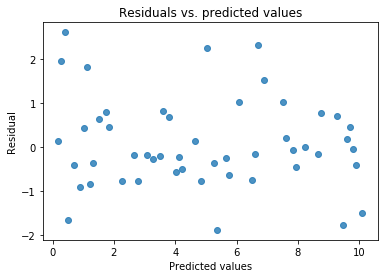

In [11]:
#residual plot
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_plot(y_test, y_score)